# Comparación de adc


Se compara el ADC del microcontrolador rp2040 contra el conversor analógico digital utilizando cuatro circuitos distintos, Cada uno de ellos
implica realizar la puesta en valor 1 o 0 del gpio23, ya que este controla la fuente de alimentación buck-boost de la placa. 



VOLTAGE DE REFERENCIA CON TESTER ZOTEK ZT102 

- CIRCUITO 1 GPIO23 0 3.250
- CIRCUITO 1 GPIO23 1 3.275

- CIRCUITO 2 GPIO23 0 3.344
- CIRCUITO 2 GPIO23 1 3.344


- CIRCUITO 3 GPIO23 0 3.048
- CIRCUITO 3 GPIO23 1 3.050




[629, 624, 619, 619, 639, 634]


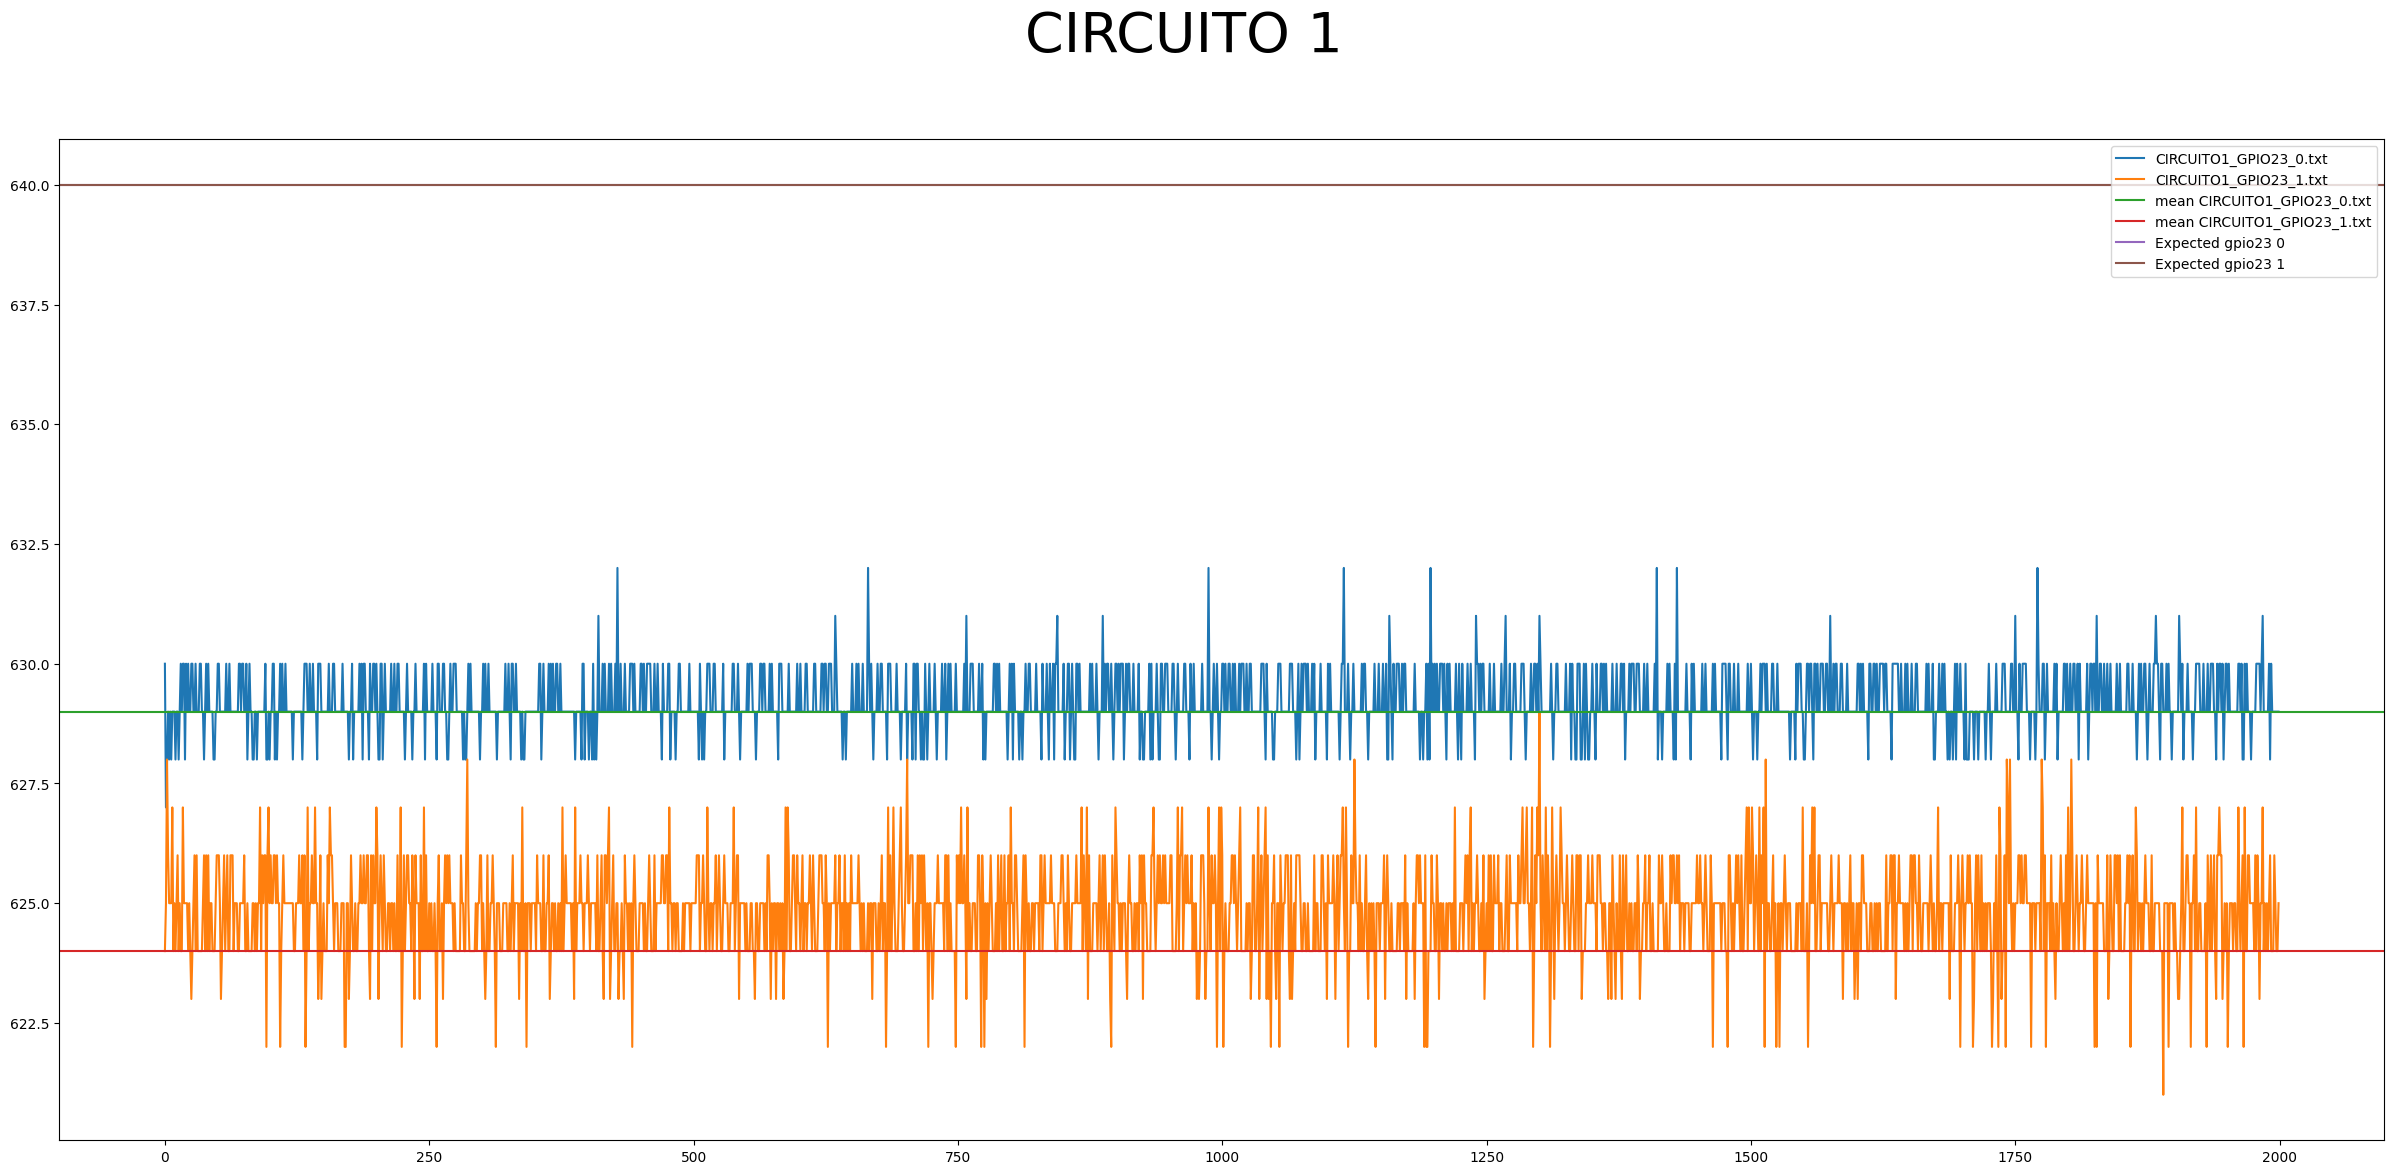

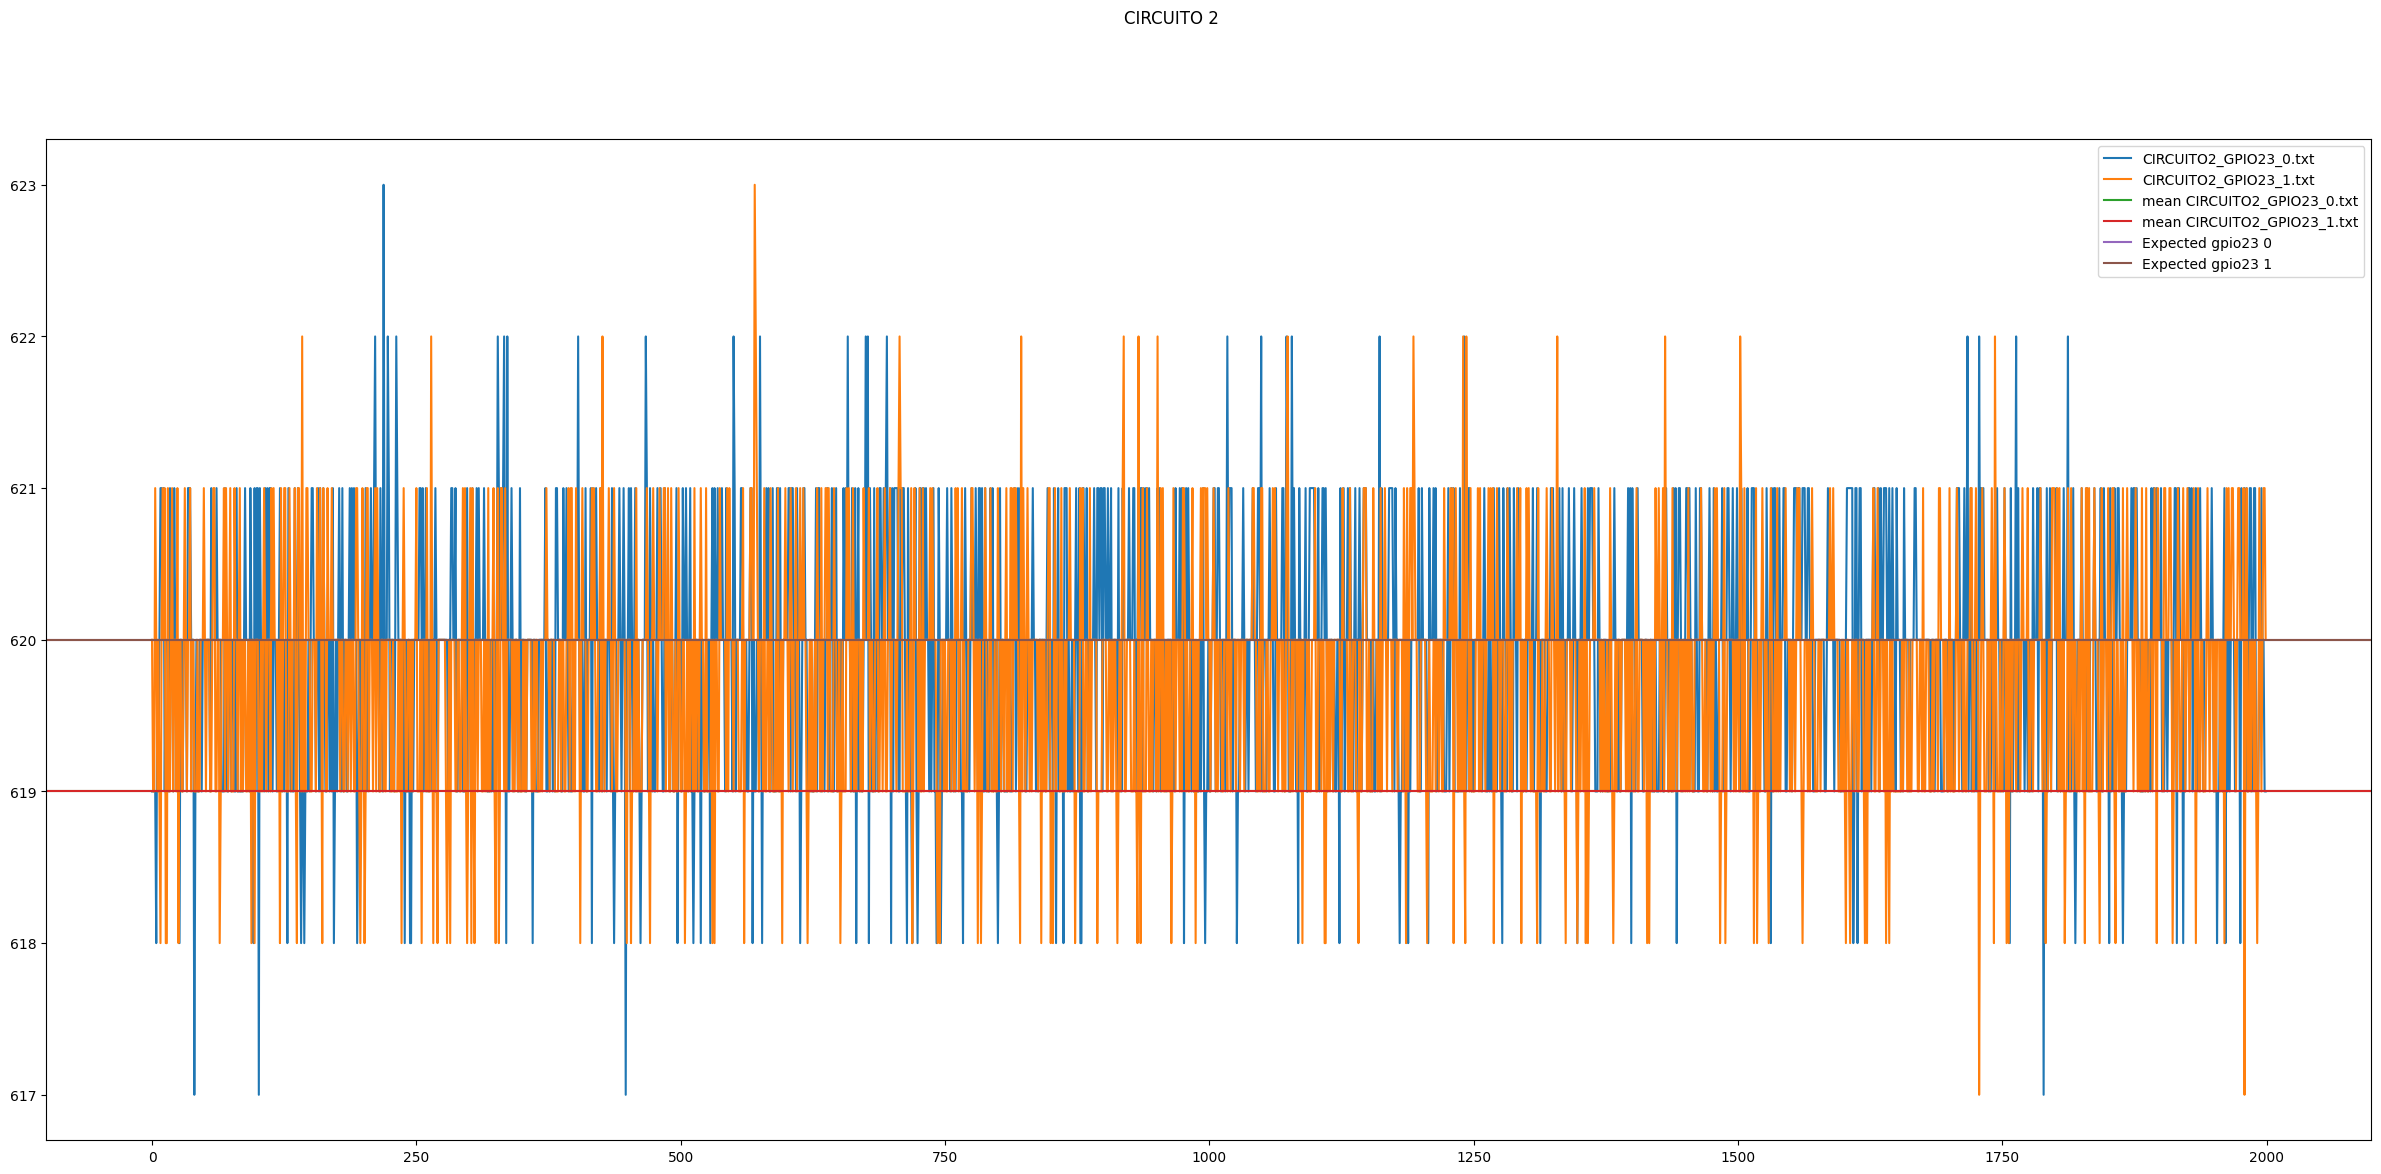

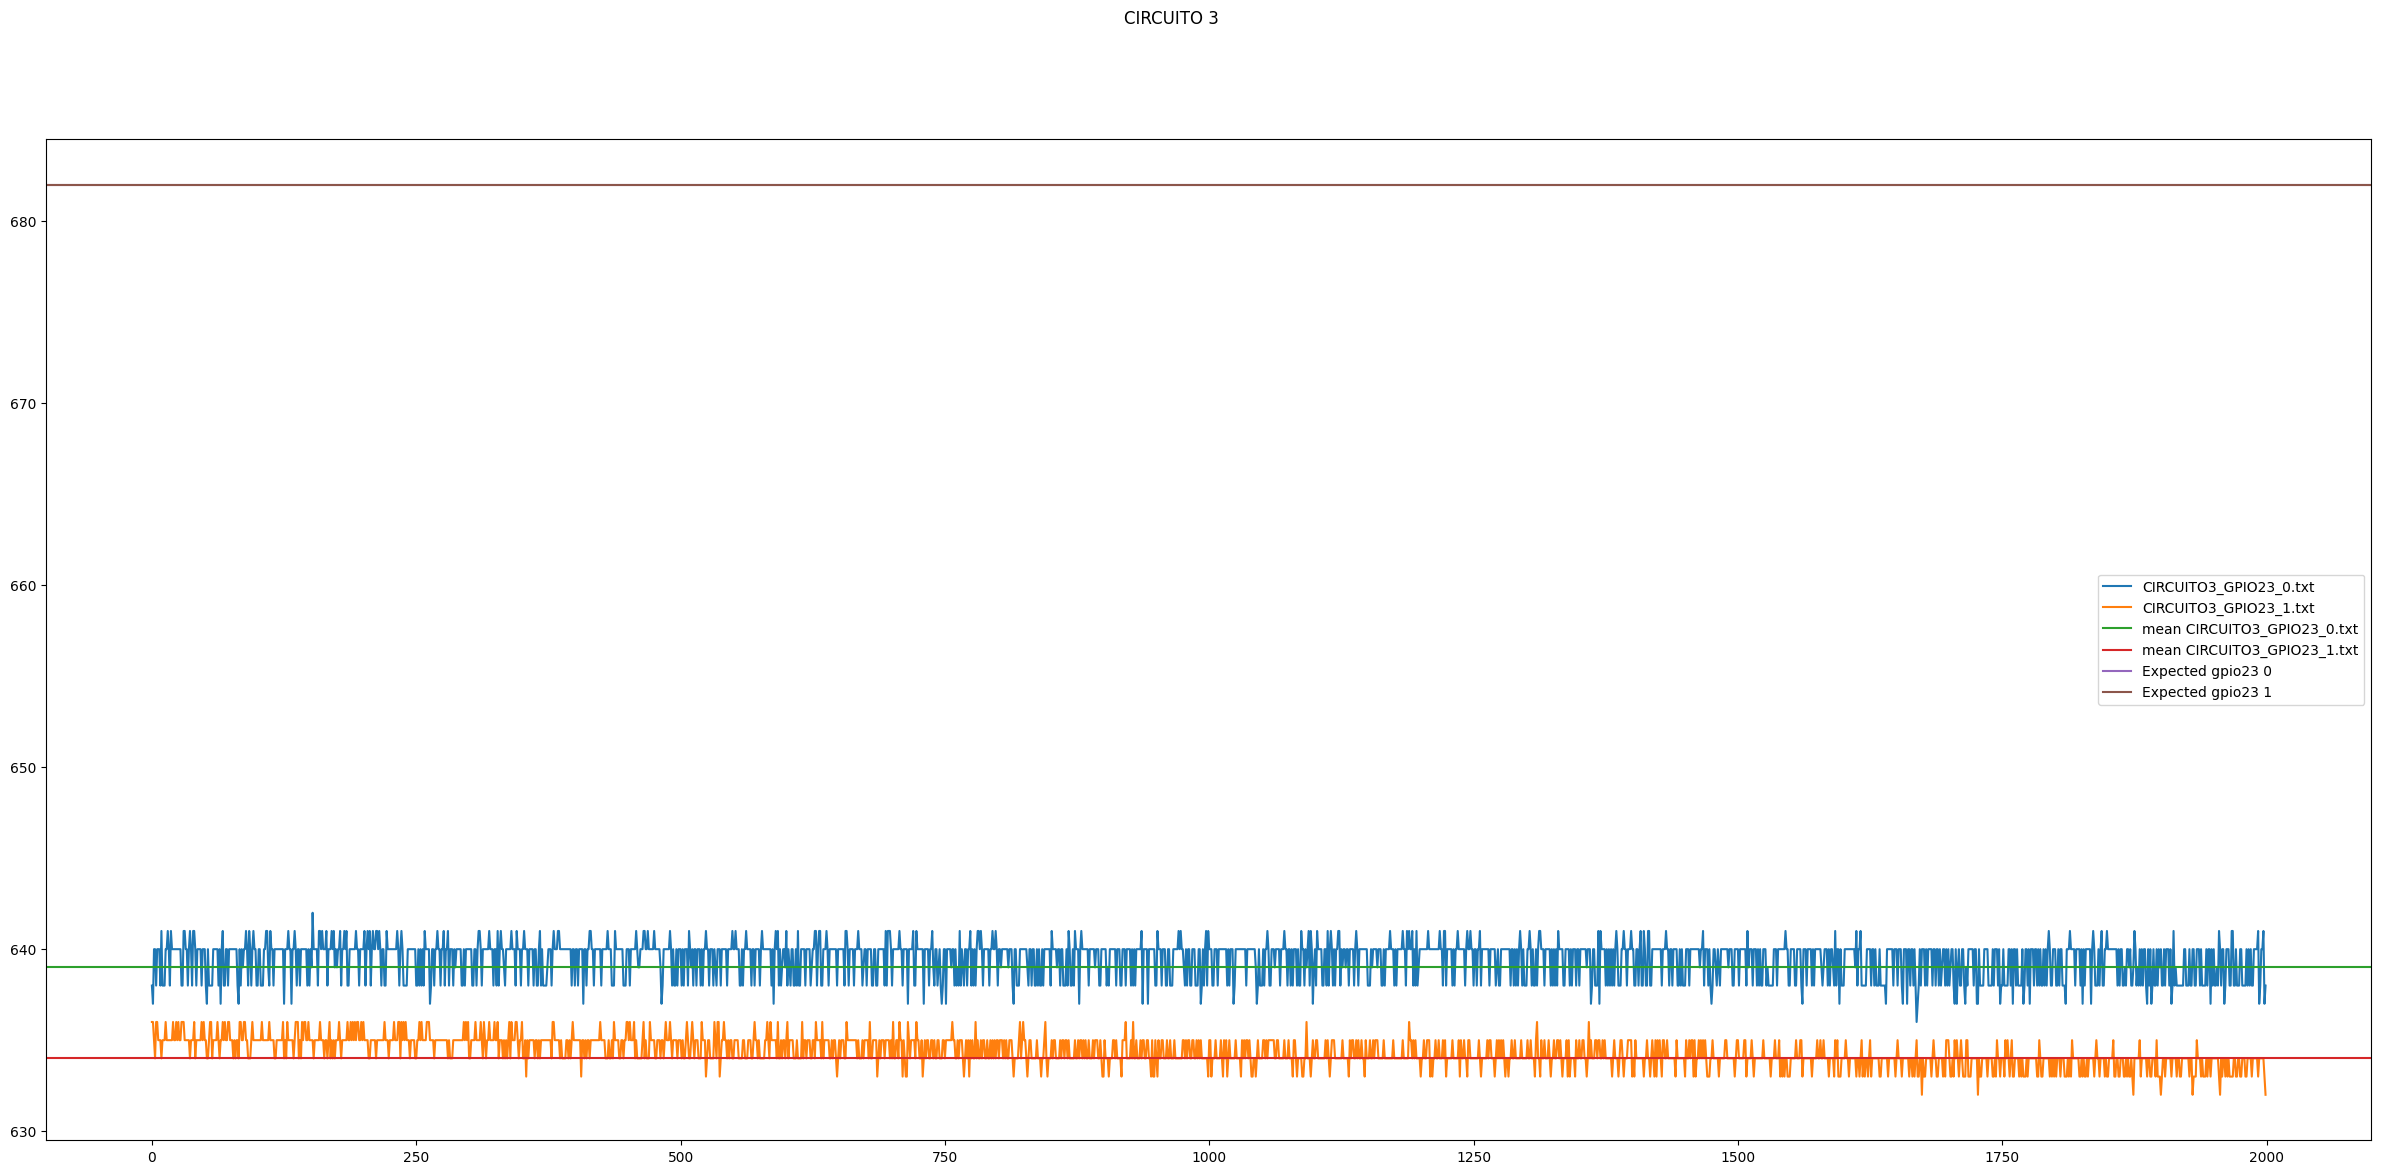

In [3]:
import numpy as np 
import matplotlib.pylab as plt


path_file ='../../../CALIBRACION_ADC/compare_ads/'
filesRP2040 = [
    'CIRCUITO1_GPIO23_0.txt',
    'CIRCUITO1_GPIO23_1.txt',
    'CIRCUITO2_GPIO23_0.txt',
    'CIRCUITO2_GPIO23_1.txt',
    'CIRCUITO3_GPIO23_0.txt',
    'CIRCUITO3_GPIO23_1.txt'
]
###### CALC PARAMETERS EXPECTED ######## 
ADC_INPUT = 0.5 
MAX_RP2040 = 2**12 
ADC_REFERENCE_RP2040_TESTER = [
    3.2, #c1 gpio_23 = 0
    3.2, #c1 gpio_23 = 1
    3.3, #c2 gpio_23 = 0
    3.3, #c2 gpio_23 = 1
    3.0, #c3 gpio_23 = 0
    3.0  #c3 gpio_23 = 1
] 

ADC_EXPECTED_RP2040 = [
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[0])*MAX_RP2040),
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[1])*MAX_RP2040),
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[2])*MAX_RP2040),
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[3])*MAX_RP2040),
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[4])*MAX_RP2040),
    int((ADC_INPUT/ADC_REFERENCE_RP2040_TESTER[5])*MAX_RP2040)
]
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 

ADC_MEAN_RP2040 = []

measure_data = np.zeros((2000,len(filesRP2040)),dtype=int)
v_compute_raw_adc= np.zeros((2000,len(filesRP2040)))
i = 0 
for file in filesRP2040: 
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(str(x),16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2 
    ADC_MEAN_RP2040.append(int(np.mean(d2)))
    i = i +1 

print(ADC_MEAN_RP2040) 
colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']


# i = 0 ,1 circuito 1 - gpio 23 = 0 , gpio23 = 1 
figc1,axc1 = plt.subplots(figsize=(30,13))
figc1.suptitle('CIRCUITO 1',fontsize=40) 
axc1.plot(n_samples_adc,measure_data[:,0],label = filesRP2040[0],color=colors[0])
axc1.plot(n_samples_adc,measure_data[:,1],label = filesRP2040[1],color=colors[1])
axc1.axhline(ADC_MEAN_RP2040[0],label=f'mean {filesRP2040[0]}',color=colors[2])
axc1.axhline(ADC_MEAN_RP2040[1],label=f'mean {filesRP2040[1]}',color=colors[3])
axc1.axhline(ADC_EXPECTED_RP2040[0],label=f'Expected gpio23 0',color=colors[4])
axc1.axhline(ADC_EXPECTED_RP2040[1],label=f'Expected gpio23 1',color=colors[5])
axc1.legend()
# i = 2 ,3 circuito 1 - gpio 23 = 0 , gpio23 = 1 
figc2,axc2 = plt.subplots(figsize=(30,13))
figc2.suptitle('CIRCUITO 2') 
axc2.plot(n_samples_adc,measure_data[:,2],label = filesRP2040[2],color=colors[0])
axc2.plot(n_samples_adc,measure_data[:,3],label = filesRP2040[3],color=colors[1])
axc2.axhline(ADC_MEAN_RP2040[2],label=f'mean {filesRP2040[2]}',color=colors[2])
axc2.axhline(ADC_MEAN_RP2040[3],label=f'mean {filesRP2040[3]}',color=colors[3])
axc2.axhline(ADC_EXPECTED_RP2040[2],label=f'Expected gpio23 0',color=colors[4])
axc2.axhline(ADC_EXPECTED_RP2040[3],label=f'Expected gpio23 1 ',color=colors[5])
axc2.legend()

figc3,axc3 = plt.subplots(figsize=(30,13))
figc3.suptitle('CIRCUITO 3') 
axc3.plot(n_samples_adc,measure_data[:,4],label = filesRP2040[4],color=colors[0])
axc3.plot(n_samples_adc,measure_data[:,5],label = filesRP2040[5],color=colors[1])
axc3.axhline(ADC_MEAN_RP2040[4],label=f'mean {filesRP2040[4]}',color=colors[2])
axc3.axhline(ADC_MEAN_RP2040[5],label=f'mean {filesRP2040[5]}',color=colors[3])
axc3.axhline(ADC_EXPECTED_RP2040[4],label=f'Expected gpio23 0',color=colors[4])
axc3.axhline(ADC_EXPECTED_RP2040[5],label=f'Expected gpio23 1',color=colors[5])
axc3.legend()


[4000, 4000, 4000, 4000, 4000, 4000]
[3979, 3979, 3983, 3985, 3880, 3885]


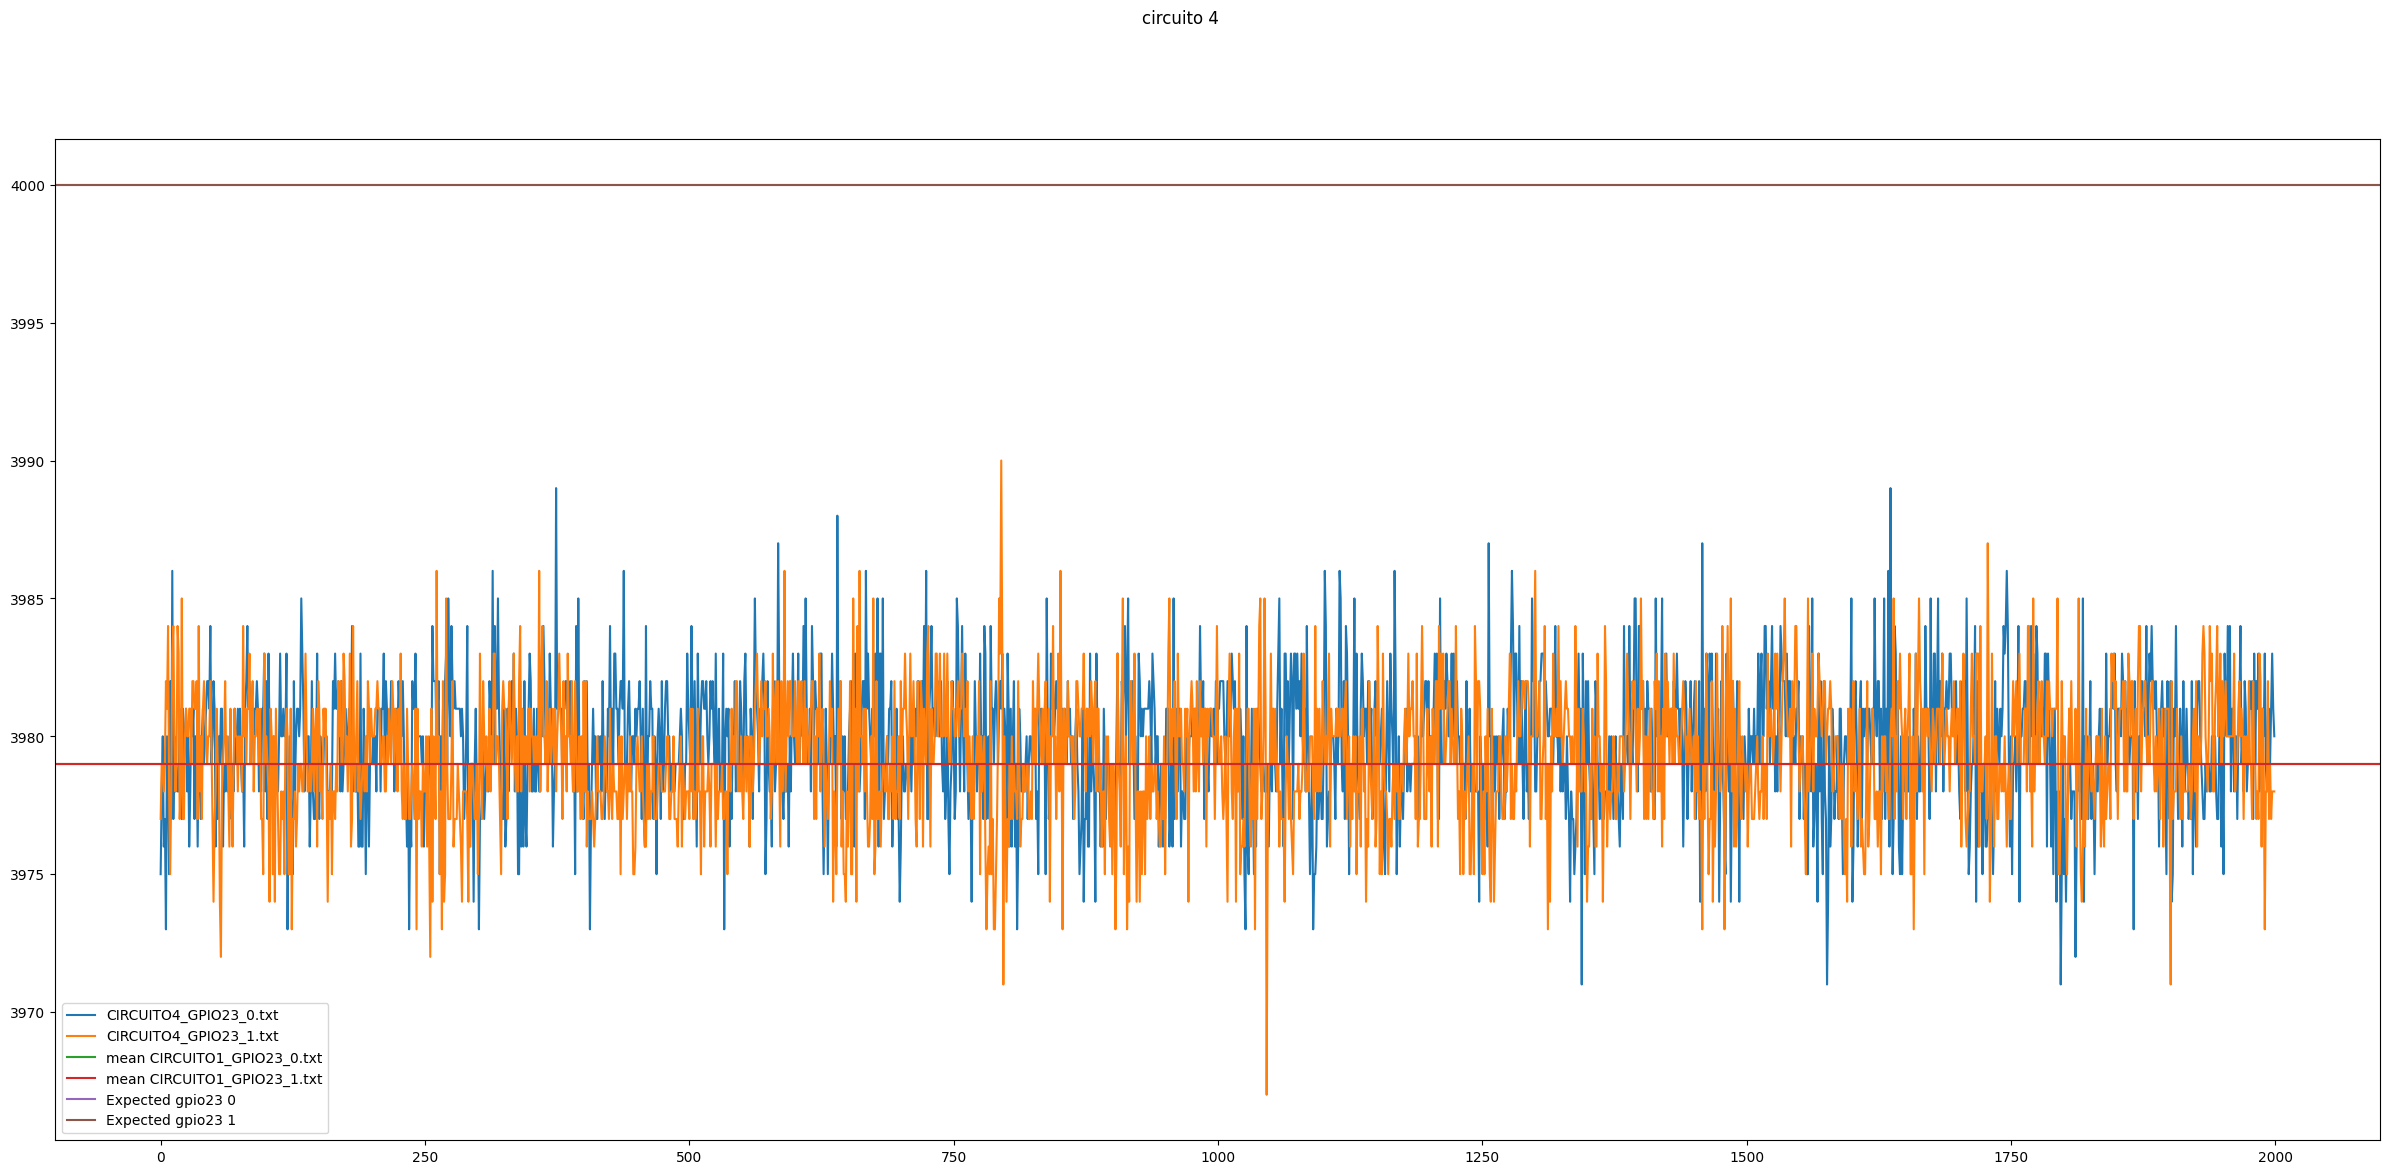

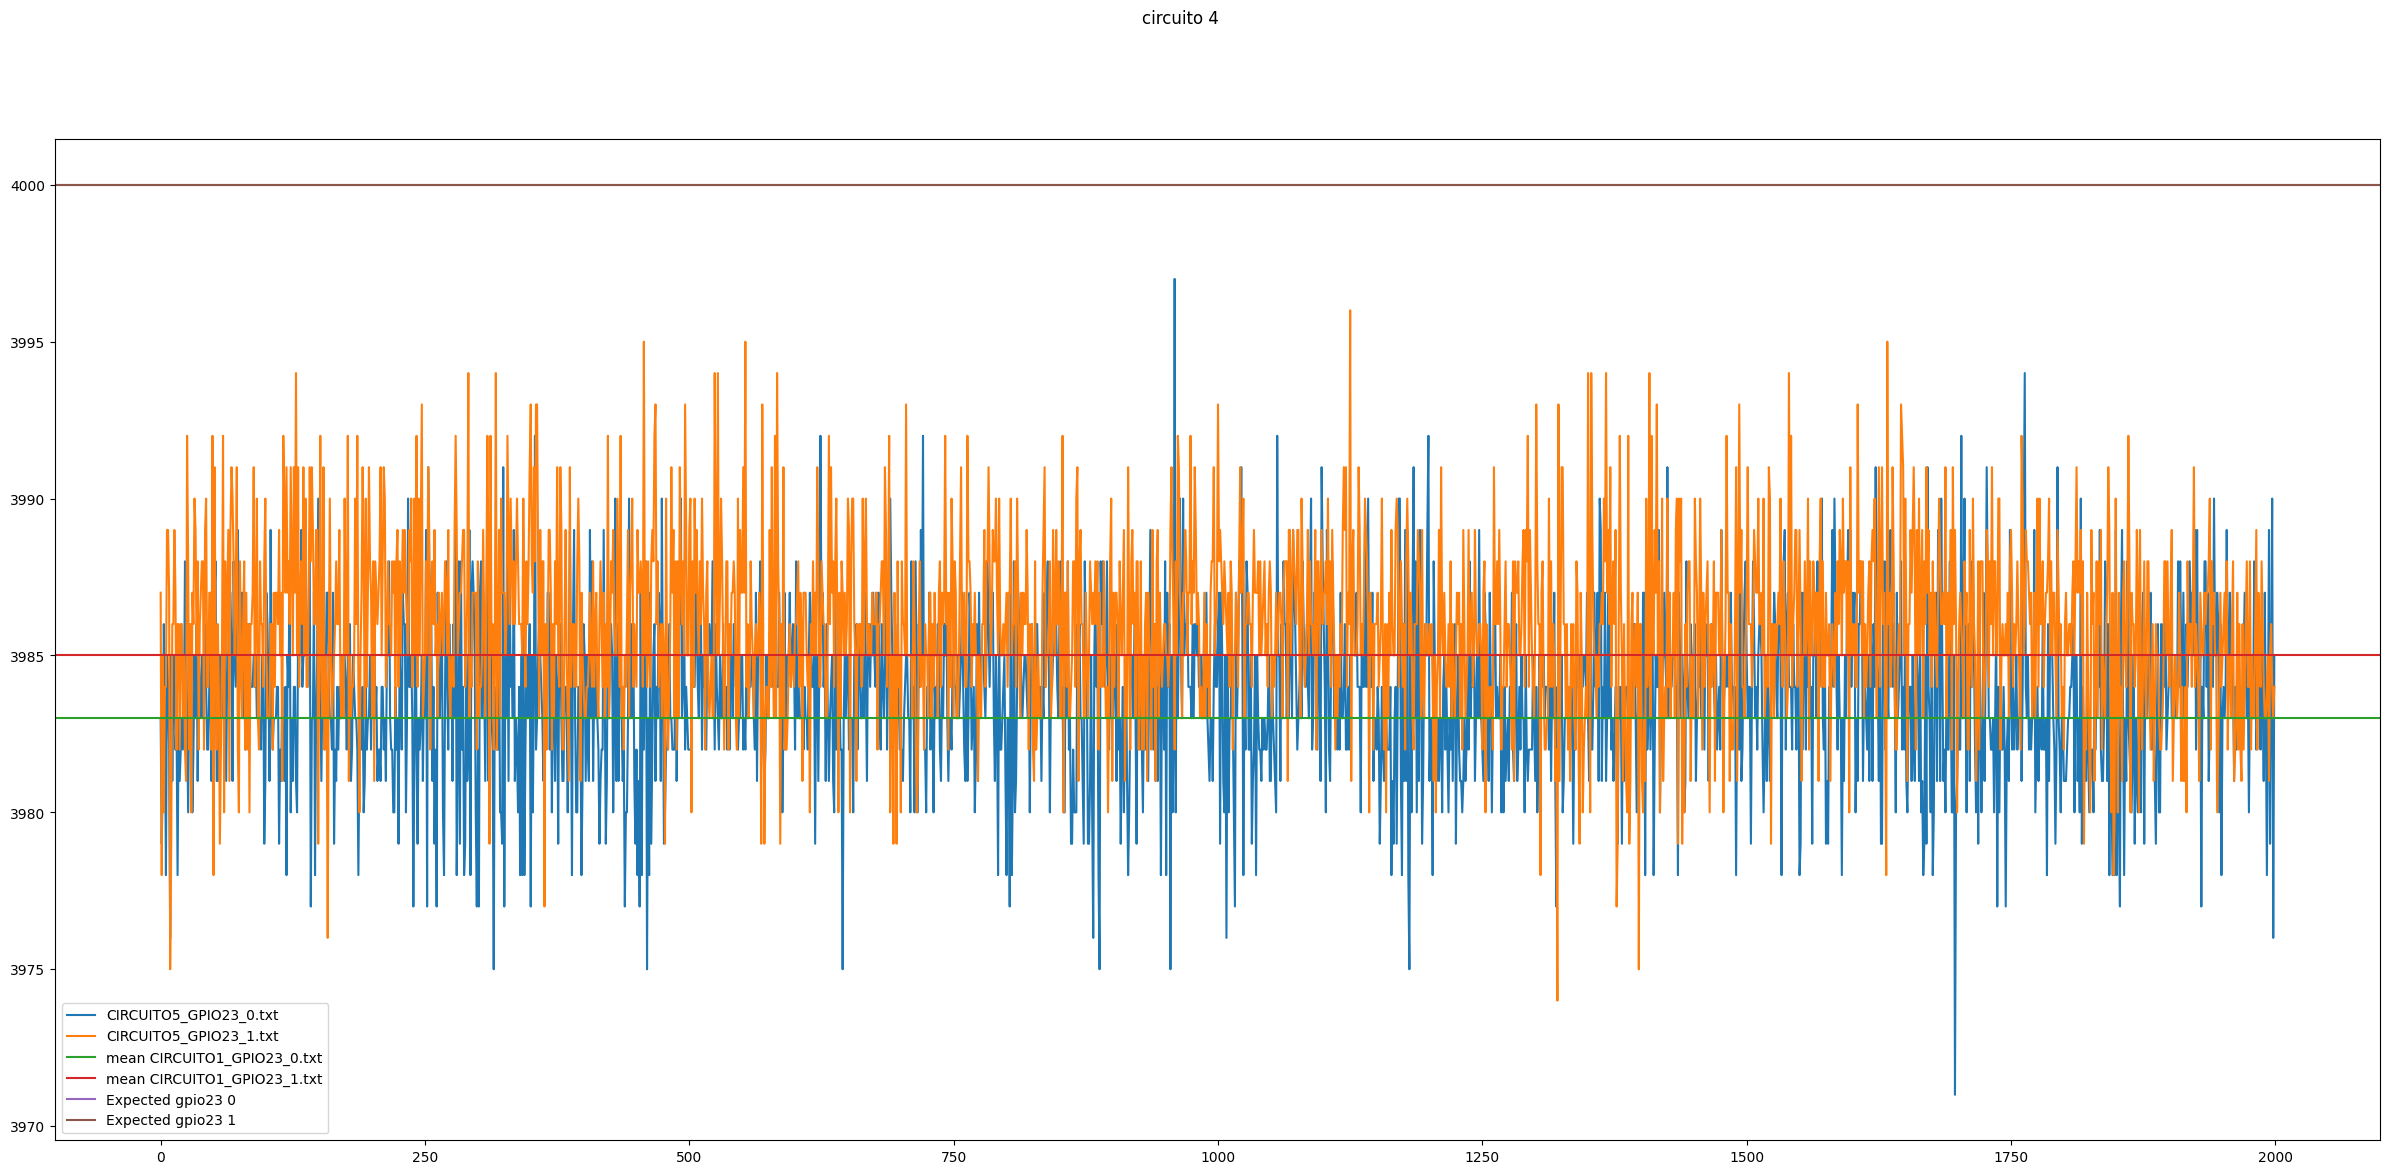

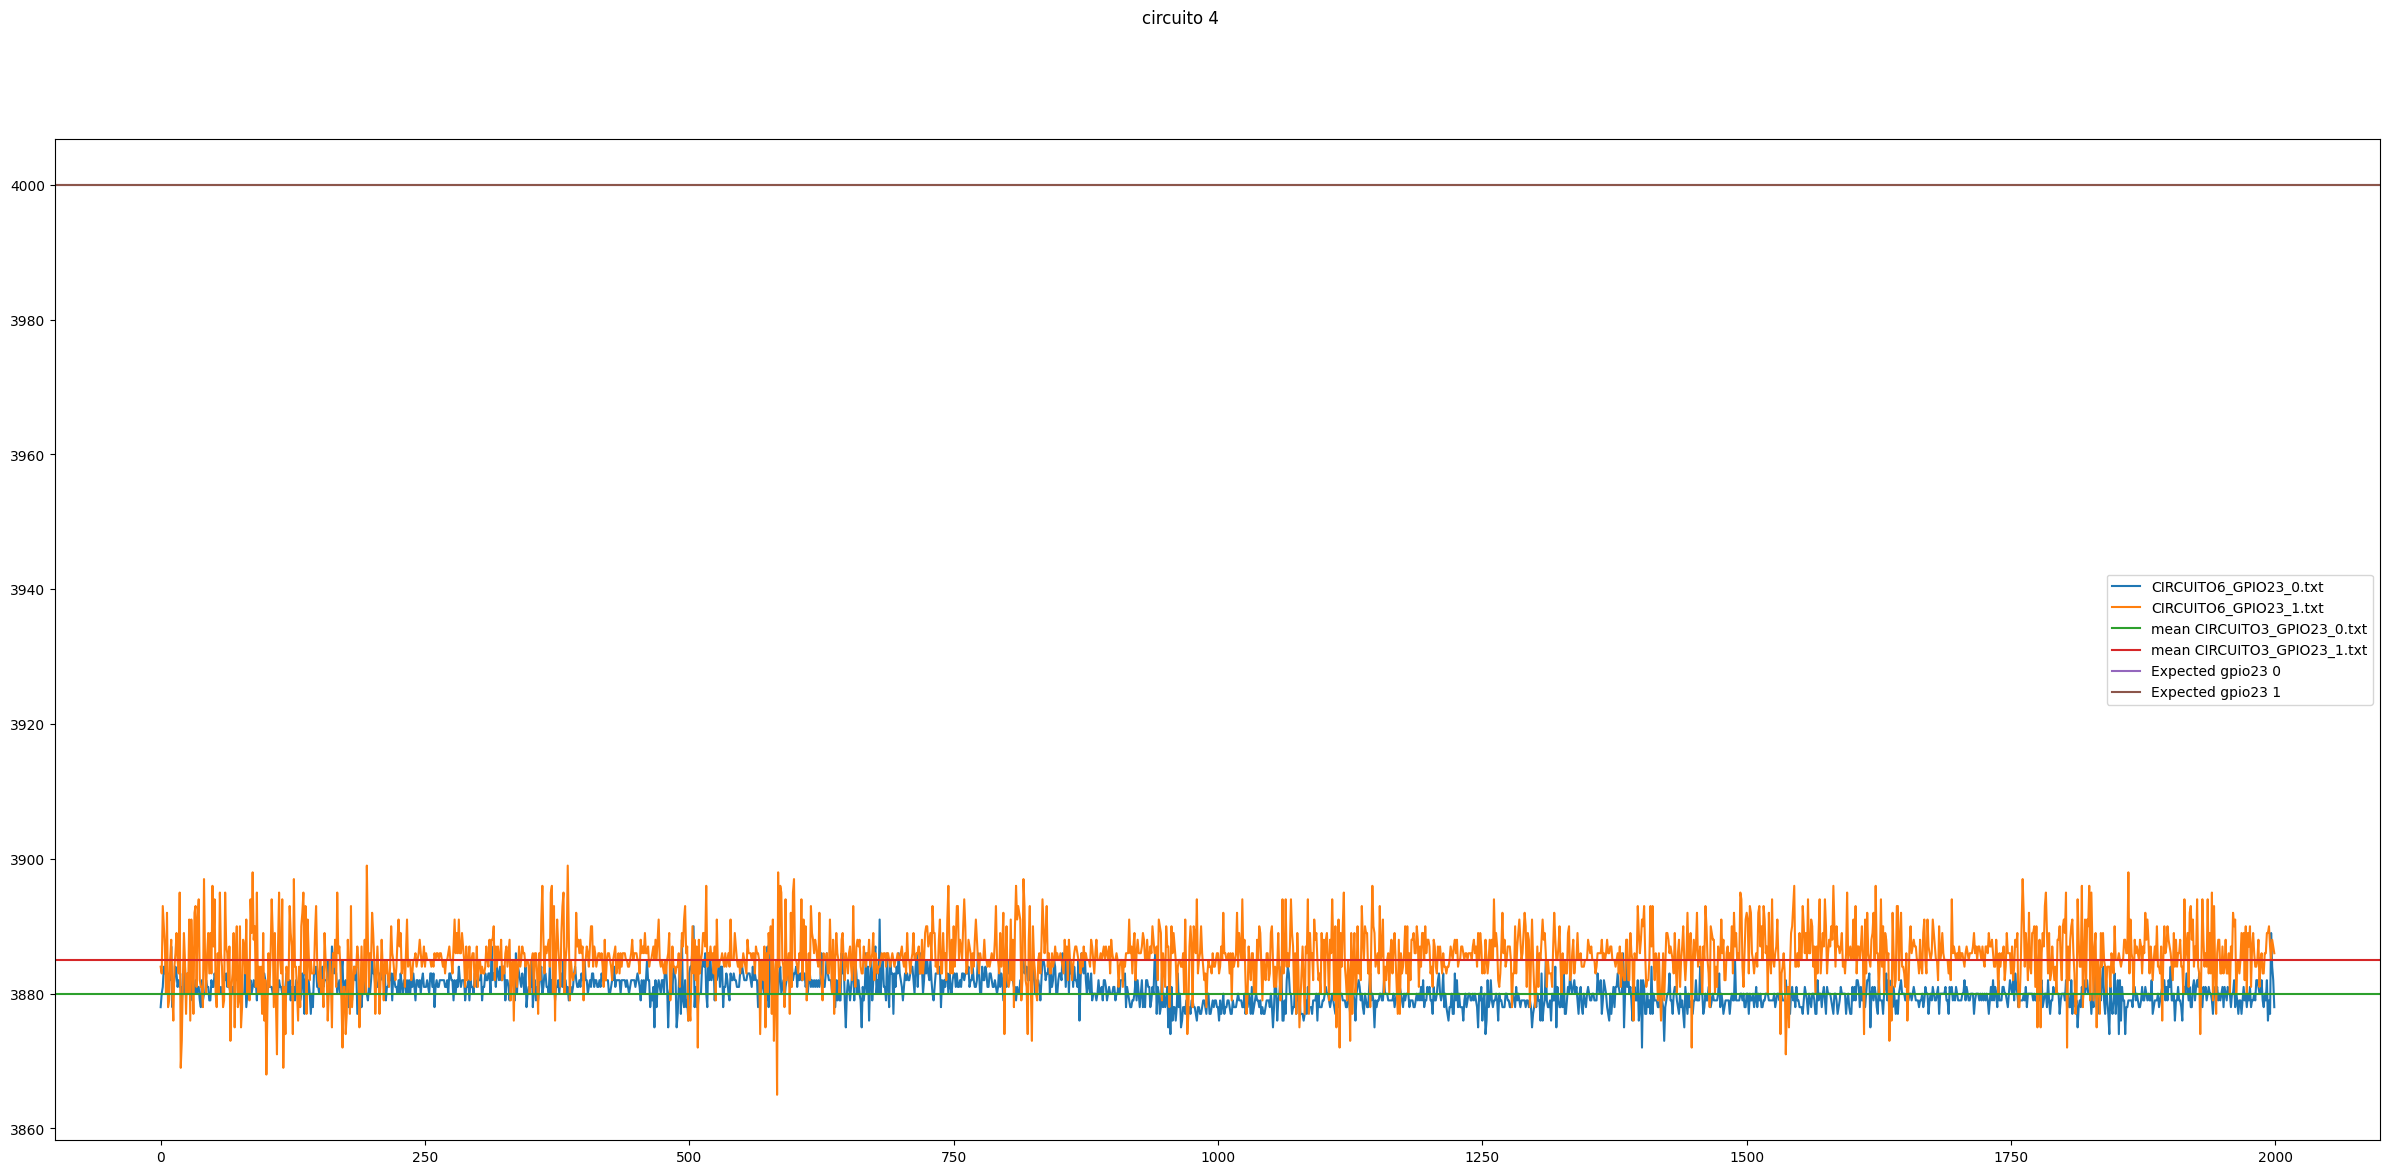

In [19]:
### circuutos con ads1115 
import numpy as np 
import matplotlib.pylab as plt


path_file ='../../../CALIBRACION_ADC/compare_ads/'
filesADS1115 = [
    'CIRCUITO4_GPIO23_0.txt',
    'CIRCUITO4_GPIO23_1.txt',
    'CIRCUITO5_GPIO23_0.txt',
    'CIRCUITO5_GPIO23_1.txt',
    'CIRCUITO6_GPIO23_0.txt',
    'CIRCUITO6_GPIO23_1.txt'
]

ADC_INPUT = 0.5 
MAX_ADS1115 = 2**15 
ADC_REFERENCE_ADS1115 = 4.096 


ADC_EXPECTED_ADS1115 = [
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115),
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115),
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115),
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115),
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115),
    int((ADC_INPUT/ADC_REFERENCE_ADS1115)*MAX_ADS1115)
]
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 

ADC_MEAN_ADS1115 = []
i=0
measure_data_ADS1115 = np.zeros((2000,len(filesADS1115)),dtype=int)
for file in filesADS1115: 
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(str(x),16) for x in d1])
    d2 =d2.astype(int) 
    measure_data_ADS1115[:,i] = d2 
    ADC_MEAN_ADS1115.append(int(np.mean(d2)))
    i = i +1 


## PLOTTER FILES ### 
print(ADC_EXPECTED_ADS1115)
print(ADC_MEAN_ADS1115) 
colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']


# i = 0 ,1 circuito 1 - gpio 23 = 0 , gpio23 = 1 
figc4,axc4 = plt.subplots(figsize=(30,13))
figc4.suptitle('circuito 4')
axc4.plot(n_samples_adc,measure_data_ADS1115[:,0],label = filesADS1115[0],color=colors[0])
axc4.plot(n_samples_adc,measure_data_ADS1115[:,1],label = filesADS1115[1],color=colors[1])
axc4.axhline(ADC_MEAN_ADS1115[0],label=f'mean {filesRP2040[0]}',color=colors[2])
axc4.axhline(ADC_MEAN_ADS1115[1],label=f'mean {filesRP2040[1]}',color=colors[3])
axc4.axhline(ADC_EXPECTED_ADS1115[0],label=f'Expected gpio23 0',color=colors[4])
axc4.axhline(ADC_EXPECTED_ADS1115[1],label=f'Expected gpio23 1',color=colors[5])
axc4.legend()

figc5,axc5 = plt.subplots(figsize=(30,13))
figc5.suptitle('circuito 4')
axc5.plot(n_samples_adc,measure_data_ADS1115[:,2],label = filesADS1115[2],color=colors[0])
axc5.plot(n_samples_adc,measure_data_ADS1115[:,3],label = filesADS1115[3],color=colors[1])
axc5.axhline(ADC_MEAN_ADS1115[2],label=f'mean {filesRP2040[0]}',color=colors[2])
axc5.axhline(ADC_MEAN_ADS1115[3],label=f'mean {filesRP2040[1]}',color=colors[3])
axc5.axhline(ADC_EXPECTED_ADS1115[2],label=f'Expected gpio23 0',color=colors[4])
axc5.axhline(ADC_EXPECTED_ADS1115[3],label=f'Expected gpio23 1',color=colors[5])
axc5.legend()


figc6,axc6 = plt.subplots(figsize=(30,13))
figc6.suptitle('circuito 4')
axc6.plot(n_samples_adc,measure_data_ADS1115[:,4],label = filesADS1115[4],color=colors[0])
axc6.plot(n_samples_adc,measure_data_ADS1115[:,5],label = filesADS1115[5],color=colors[1])
axc6.axhline(ADC_MEAN_ADS1115[4],label=f'mean {filesRP2040[4]}',color=colors[2])
axc6.axhline(ADC_MEAN_ADS1115[5],label=f'mean {filesRP2040[5]}',color=colors[3])
axc6.axhline(ADC_EXPECTED_ADS1115[4],label=f'Expected gpio23 0',color=colors[4])
axc6.axhline(ADC_EXPECTED_ADS1115[5],label=f'Expected gpio23 1',color=colors[5])
axc6.legend()





# Comparación de tensiones entre circuitos

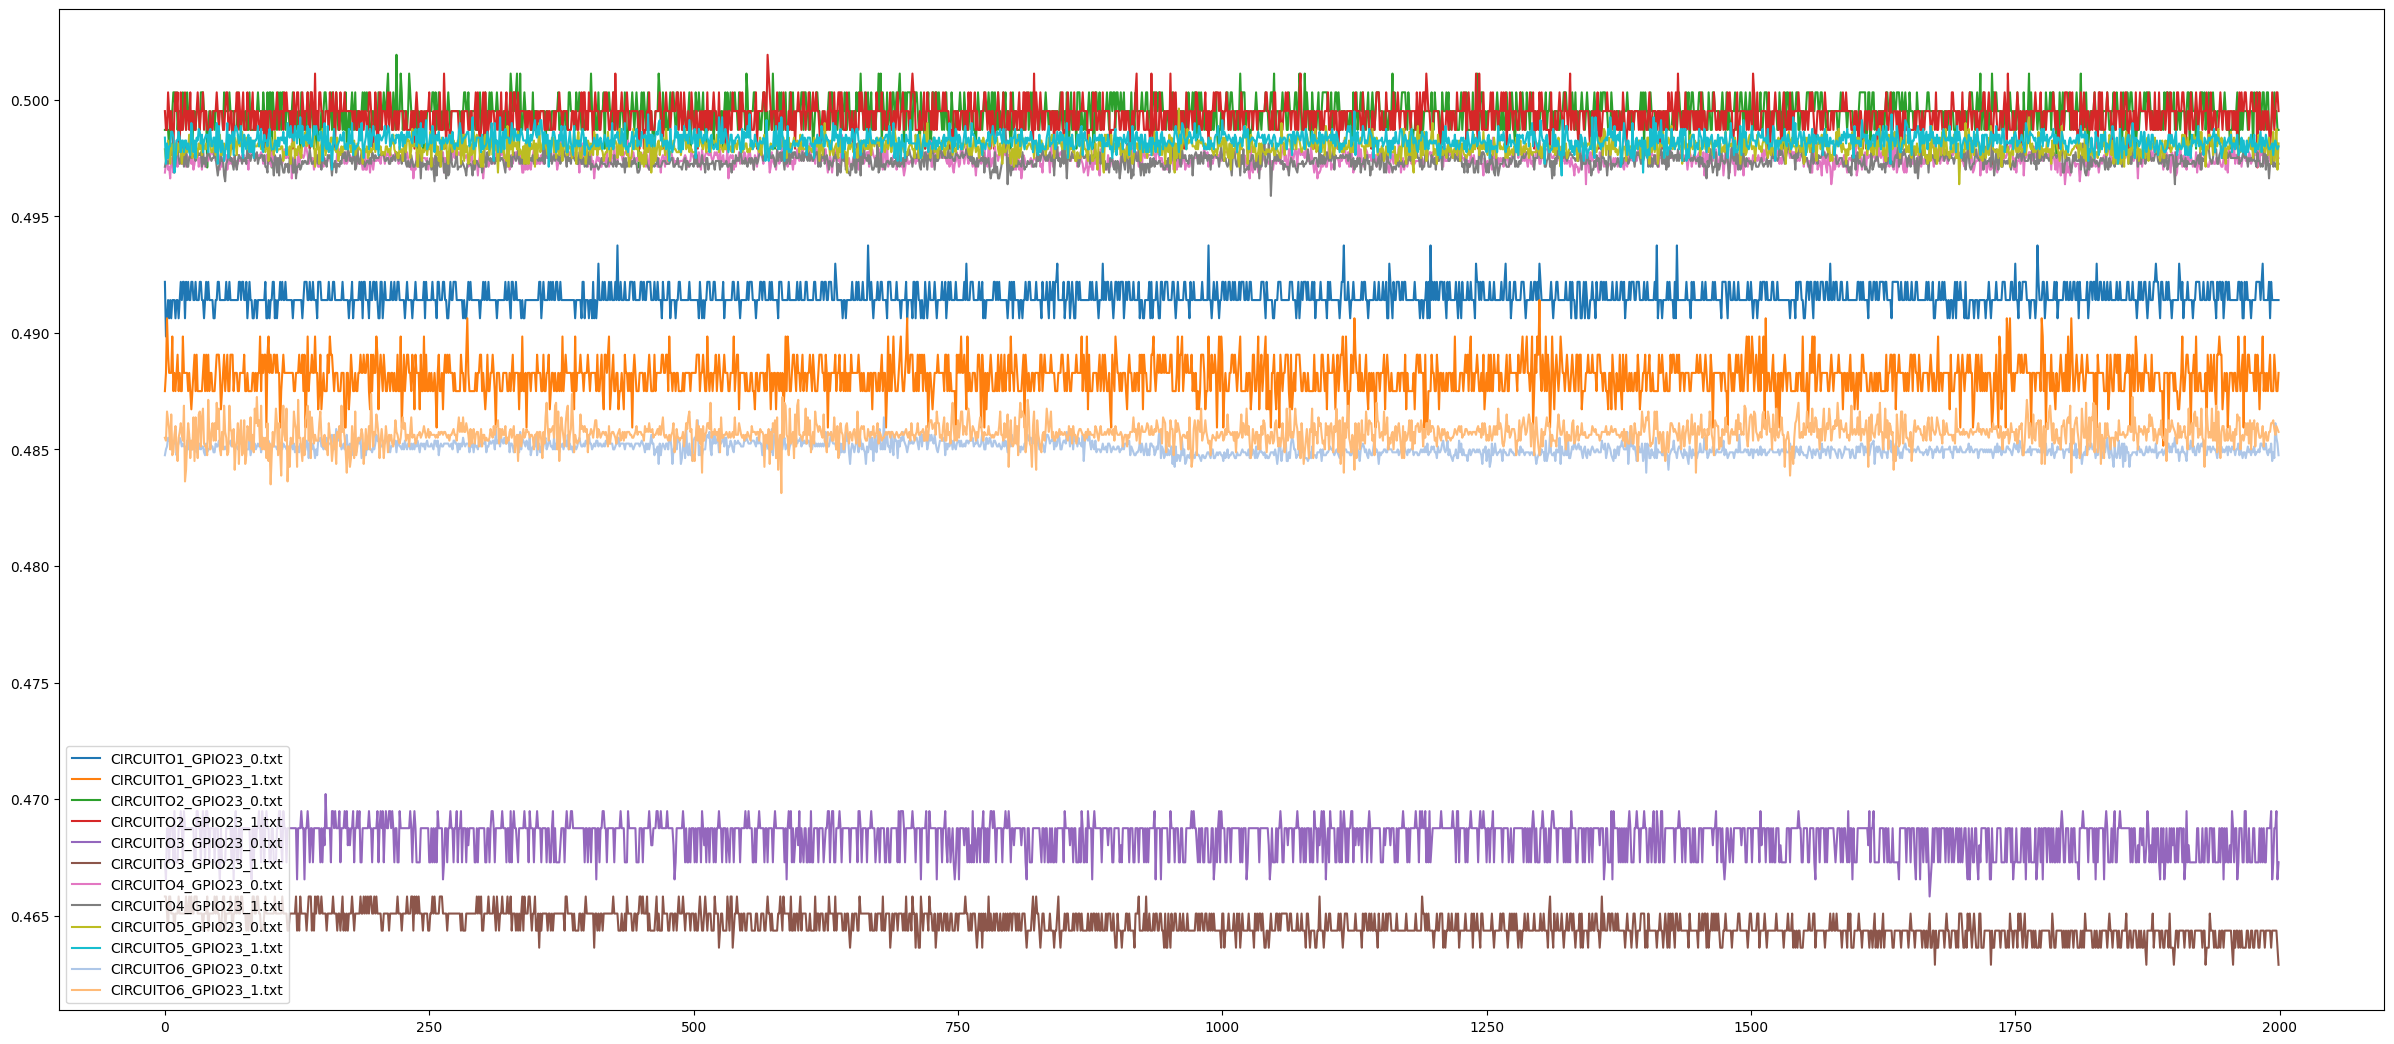

In [25]:

path_file ='../../../CALIBRACION_ADC/compare_ads/'
filesall = [
    'CIRCUITO1_GPIO23_0.txt',
    'CIRCUITO1_GPIO23_1.txt',
    'CIRCUITO2_GPIO23_0.txt',
    'CIRCUITO2_GPIO23_1.txt',
    'CIRCUITO3_GPIO23_0.txt',
    'CIRCUITO3_GPIO23_1.txt',
    'CIRCUITO4_GPIO23_0.txt',
    'CIRCUITO4_GPIO23_1.txt',
    'CIRCUITO5_GPIO23_0.txt',
    'CIRCUITO5_GPIO23_1.txt',
    'CIRCUITO6_GPIO23_0.txt',
    'CIRCUITO6_GPIO23_1.txt'
]
BITS_RP2040 = 12 
BITS_ADS1115 = 15 

voltage_reference_adcs=[
    3.2, #c1 gpio_23 = 0
    3.2, #c1 gpio_23 = 1
    3.3, #c2 gpio_23 = 0
    3.3, #c2 gpio_23 = 1
    3.0, #c3 gpio_23 = 0
    3.0,  #c3 gpio_23 = 1
    4.096,
    4.096,
    4.096,
    4.096,
    4.096,
    4.096
]
BITS = [ 
    2**BITS_RP2040,
    2**BITS_RP2040,
    2**BITS_RP2040,
    2**BITS_RP2040,
    2**BITS_RP2040,
    2**BITS_RP2040,
    2**BITS_ADS1115,
    2**BITS_ADS1115,
    2**BITS_ADS1115,
    2**BITS_ADS1115,
    2**BITS_ADS1115,
    2**BITS_ADS1115
    ]


voltage_input = 0.5 # units volts
measure_data = np.zeros((2000,len(filesall)),dtype=int)
v_compute_raw_adc= np.zeros((2000,len(filesall)))
voltage_adc_input = 0.5 
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
adc_mean_all = []
i = 0 
for file in filesall: 
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(str(x),16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2#*(0.5/voltage_reference_adcs[i]) 
    v_compute_raw_adc[:,i] =  measure_data[:,i]*(voltage_reference_adcs[i]/BITS[i])
    adc_mean_all.append(int(np.mean(d2)))
    i = i +1 



colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']








figVts, axvolts = plt.subplots(figsize=(30,13))
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,0],label=filesall[0], color=colors[0])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,1],label=filesall[1], color=colors[1])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,2],label=filesall[2], color=colors[2])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,3],label=filesall[3], color=colors[3])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,4],label=filesall[4], color=colors[4])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,5],label=filesall[5], color=colors[5])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,6],label=filesall[6], color=colors[6])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,7],label=filesall[7], color=colors[7])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,8],label=filesall[8], color=colors[8])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,9],label=filesall[9], color=colors[9])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,10],label=filesall[10], color=colors[10])
axvolts.plot(n_samples_adc,v_compute_raw_adc[:,11],label=filesall[11], color=colors[11])

axvolts.legend()




In [26]:
from IPython.display import HTML
linea1 
linea2 
linea3 
linea4 
linea5
linea6
linea7
linea8
linea9
linea10
linea11




html_code ="""
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Circuto<br>Nº </th>
    <th class="tg-0lax">gpio<br>23</th>
    <th class="tg-0lax">ADC<br>medio</th>
    <th class="tg-0lax">ADC<br>Esperado</th>
    <th class="tg-0lax">Error</th>
    <th class="tg-0lax">Error <br>Relativo</th>
    <th class="tg-0lax">Tensión <br>de referencia</th>
    <th class="tg-0lax">Conversion<br>ADC a volt</th>
    <th class="tg-0lax">Error </th>
    <th class="tg-0lax">Error relativo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">5</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>


HTML(html_code)

CircutoNº,gpio23,ADCmedio,ADCEsperado,Error,Error Relativo,Tensión de referencia,ConversionADC a volt,Error,Error relativo
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


In [ ]:
# Repetibilidad y exactitud circuito 2 
path = '../../../CALIBRACION_ADC/repetibilidad/' 
files = ['repeat0',
         'repeat1',
         'repeat2',
         'repeat3',
         'repeat4',
         'repeat5',
         'repeat6',
        ]




colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#aec7e8',
          '#ffbb78',
          '#98df8a',
          '#ff9896',
          '#c5b0d5',
          '#c49c94',
          '#f7b6d2',
          '#c7c7c7',
          '#dbdb8d',
          '#9edae5',
          '#fdae61',
          '#ff9896'
         ]



measure_data_repeat = np.zeros((2000,len(files)),dtype=int)

for file in files: 
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(str(x),16) for x in d1])
    d2 =d2.astype(int) 
    measure_data_ADS1115[:,i] = d2 
    i = i +1 


### plotter raw_adc #### 


### plotter voltage adc ### 


